<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/adv2_sOS_eos_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#work perfect but more manual

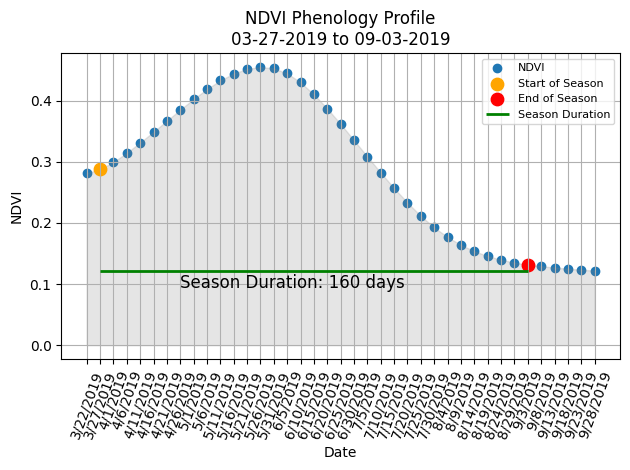

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# Define the data points as arrays (same as in the previous example)
dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
         "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
         "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
         "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
         "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
          0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
          0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
          0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
          0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]

# Calculate the total area under the curve
total_area = np.trapz(values, dx=1)

#################################################
#################################################
# base = (min(values[:len(values) // 2]) + min(values[len(values) // 2:])) / 2
# total_area = np.trapz([base] * len(values), dx=1)
#################################################

# Calculate the target areas (5% and 95% of the total area)
target_area_5_percent = 0.05 * total_area
target_area_95_percent = 0.95 * total_area

# Initialize variables to keep track of accumulated area
accumulated_area = 0
beginning_point = None
ending_point = None

# Iterate through the data points to find the desired points
for i in range(len(dates)):
    accumulated_area += values[i]
    if accumulated_area >= target_area_5_percent and beginning_point is None:
        beginning_point = (dates[i], values[i])
    if accumulated_area >= target_area_95_percent:
        ending_point = (dates[i], values[i])
        break
##########################################
date1 = datetime.strptime(beginning_point[0], "%m/%d/%Y")
date2 = datetime.strptime(ending_point[0], "%m/%d/%Y")


# Calculate the duration of the season
season_duration = date2 - date1
season_duration = season_duration.days
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.scatter(dates, values, label="NDVI")

####
# Highlight the area under the curve
ax.fill_between(dates, 0, values, where=[True] * len(dates), color='gray', alpha=0.2)

########$

# Highlight the beginning and ending points
ax.scatter(beginning_point[0], beginning_point[1], color='orange', label="Start of Season",s=80)
ax.scatter(ending_point[0], ending_point[1], color='red', label="End of Season",s=80)

##################################################################################################
# Annotate the duration of the season and SOS, EOS

#############

#qa=(int(ending_point[0])-int(beginning_point[0]))

plt.text(7, min(values)-0.02, f"Season Duration: {season_duration} days", fontsize=12, va='center')
################
# Add a horizontal line to highlight the seasonal duration
ax.hlines(y=min(values), xmin=beginning_point[0], xmax=ending_point[0], color='green', linewidth=2, label='Season Duration')

##########################################################################################################################################################################
# plt.annotate('', xy=(0.1,0.15),  xycoords='data', textcoords='data',
#             arrowprops={'arrowstyle': '|-|'})

plt.annotate('local max', xy=(0.3, -5.5), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

# plt.annotate("Start of the Season", xy=(min(values)), xytext=(20, 20),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))
#############$##############################################################################################################################
# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("NDVI")
ax.set_title("NDVI Phenology Profile")
ax.set_title(f"NDVI Phenology Profile\n{date1.strftime('%m-%d-%Y')} to {date2.strftime('%m-%d-%Y')}")
# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Add a legend
#ax.legend()
##########
ax.legend(prop={"size": 8},loc="upper right")

############
plt.grid()
# Display the plot
plt.tight_layout()
plt.show()

##############################################################################


#the Same that avobe but more concrete

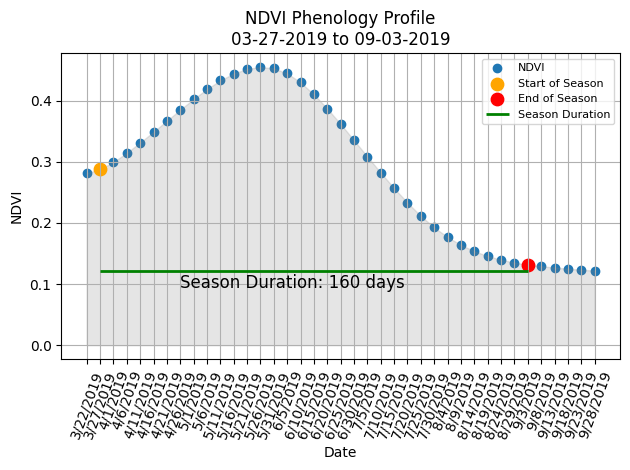

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


# # Define the data points as arrays (same as in the previous example)
# dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
#          "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
#          "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
#          "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
#          "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
# values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
#           0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
#           0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
#           0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
#           0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]


######
# Load data from a CSV file
data = pd.read_csv('NDVI.csv')

# Extract dates and values from the DataFrame
dates = data['Date'].tolist()
values = data['NDVI'].tolist()
########

# Calculate the total area under the curve
total_area = np.trapz(values, dx=1)

# Calculate the target areas (5% and 95% of the total area)
target_area_5_percent = 0.05 * total_area
target_area_95_percent = 0.95 * total_area

# Initialize variables to keep track of accumulated area
accumulated_area = 0
beginning_point = None
ending_point = None

# Iterate through the data points to find the desired points
for i in range(len(dates)):
    accumulated_area += values[i]
    if accumulated_area >= target_area_5_percent and beginning_point is None:
        beginning_point = (dates[i], values[i])
    if accumulated_area >= target_area_95_percent:
        ending_point = (dates[i], values[i])
        break

date1 = datetime.strptime(beginning_point[0], "%m/%d/%Y")
date2 = datetime.strptime(ending_point[0], "%m/%d/%Y")

# Calculate the duration of the season
season_duration = date2 - date1
season_duration = season_duration.days
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.scatter(dates, values, label="NDVI")

####
# Highlight the area under the curve
ax.fill_between(dates, 0, values, where=[True] * len(dates), color='gray', alpha=0.2)

# Highlight the beginning and ending points
ax.scatter(beginning_point[0], beginning_point[1], color='orange', label="Start of Season",s=80)
ax.scatter(ending_point[0], ending_point[1], color='red', label="End of Season",s=80)

# Season Duration highlighted Text
plt.text(7, min(values)-0.02, f"Season Duration: {season_duration} days", fontsize=12, va='center')

# Add a horizontal line to highlight the seasonal duration
ax.hlines(y=min(values), xmin=beginning_point[0], xmax=ending_point[0], color='green', linewidth=2, label='Season Duration')

# Attempt to highligth the seasonal period
# plt.annotate('local max', xy=(0.3, -5.5), xytext=(3, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("NDVI")
ax.set_title("NDVI Phenology Profile")
ax.set_title(f"NDVI Phenology Profile\n{date1.strftime('%m-%d-%Y')} to {date2.strftime('%m-%d-%Y')}")
# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Add a legend
ax.legend(prop={"size": 8},loc="upper right")

plt.grid()
plt.tight_layout()
plt.show()

#try program to filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('/content/interpolated_data.csv')

# Extract dates and values from the DataFrame
dates = data['Date'].tolist()
values = data['NDVI'].tolist()

# Calculate the minimum value in the entire dataset
min_value = min(values)
print(f"Minimum Value in the Dataset: {min_value}")

# Find all instances of the minimum value and their corresponding dates
minima = [(date, value) for date, value in zip(dates, values) if value == min_value]

# Print all minimum values and their dates
print("All Minimum Values:")
for date, value in minima:
    print(f"Date: {date}, Value: {value}")

# Get user input for the start and end dates
start_date_input = input("Enter the start date (MM/DD/YYYY): ")
end_date_input = input("Enter the end date (MM/DD/YYYY): ")

# Convert user input to datetime objects
start_date = datetime.strptime(start_date_input, "%m/%d/%Y")
end_date = datetime.strptime(end_date_input, "%m/%d/%Y")

# Filter the data based on the selected time window
filtered_data = data[(data['Date'] >= start_date_input) & (data['Date'] <= end_date_input)]

dates = filtered_data['Date'].tolist()
values = filtered_data['Value'].tolist()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.scatter(dates, values, label="NDVI")

# Highlight the area under the curve
ax.fill_between(dates, 0, values, where=[True] * len(dates), color='gray', alpha=0.2)

# Highlight the beginning and ending points
ax.scatter(start_date_input, values[0], color='orange', label="Start of Season", s=80)
ax.scatter(end_date_input, values[-1], color='red', label="End of Season", s=80)

# Plot the minimum values with their dates
min_dates, min_values = zip(*minima)
ax.scatter(min_dates, min_values, color='blue', label="Minimum Value", s=80)

# Rest of the code to complete the plot
# ...



#This wor better but it is more manual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ndvi_data = pd.read_csv('/content/drive/MyDrive/research-the/interpolated_data_filled_splines.csv')

import numpy as np
from scipy.signal import find_peaks
import pandas as pd
# Assuming your NDVI data is stored in a DataFrame called 'ndvi_data'
# Convert the 'Date' column to datetime format if it's not already

# Extract the NDVI values as a NumPy array
ndvi_values = ndvi_data['NDVI'].values

# Find local maxima
maxima_indices, _ = find_peaks(ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Find local minima
minima_indices, _ = find_peaks(-ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Create a DataFrame to store critical points
critical_points = pd.DataFrame({'Date': ndvi_data['Date'][maxima_indices].values.tolist() +
                                               ndvi_data['Date'][minima_indices].values.tolist(),
                                'NDVI': ndvi_values[maxima_indices].tolist() +
                                        ndvi_values[minima_indices].tolist(),
                                'Type': ['Maxima'] * len(maxima_indices) + ['Minima'] * len(minima_indices)})

# Sort the critical points by date
critical_points = critical_points

# Display the critical points
print(critical_points)

# Plot the critical points
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['Date'], ndvi_values, label='NDVI')
plt.scatter(critical_points['Date'], critical_points['NDVI'], c=critical_points['Type'].map({'Maxima': 'r', 'Minima': 'g'}), label='Critical Points')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI with Critical Points')
plt.legend()
plt.show()